In [1]:
import sys
sys.path.append('/home/hashmi/ResearchBook/Tracking/Notebooks')
from central_import import *

figure_directory = '../../Figures/Databuild/'
os.makedirs(figure_directory,exist_ok=True)
set_plot_style()

In [2]:
keys=['nFTHits', 'FT_x', 'FT_z','px','py','pz','eta','phi','ovtx_x','ovtx_y', 'chi2','ndof','isMatched']
seed_data = uproot.open('../../../Data/TrackDumper/SciFi/Dumper_recTracks.root:Hits_detectors').arrays(keys,library='pd')

seed_data['tx'] = seed_data['px'] / seed_data['pz']
seed_data['ty'] = seed_data['py'] / seed_data['pz']
seed_data['chi2perdof'] = seed_data['chi2']/seed_data['ndof']

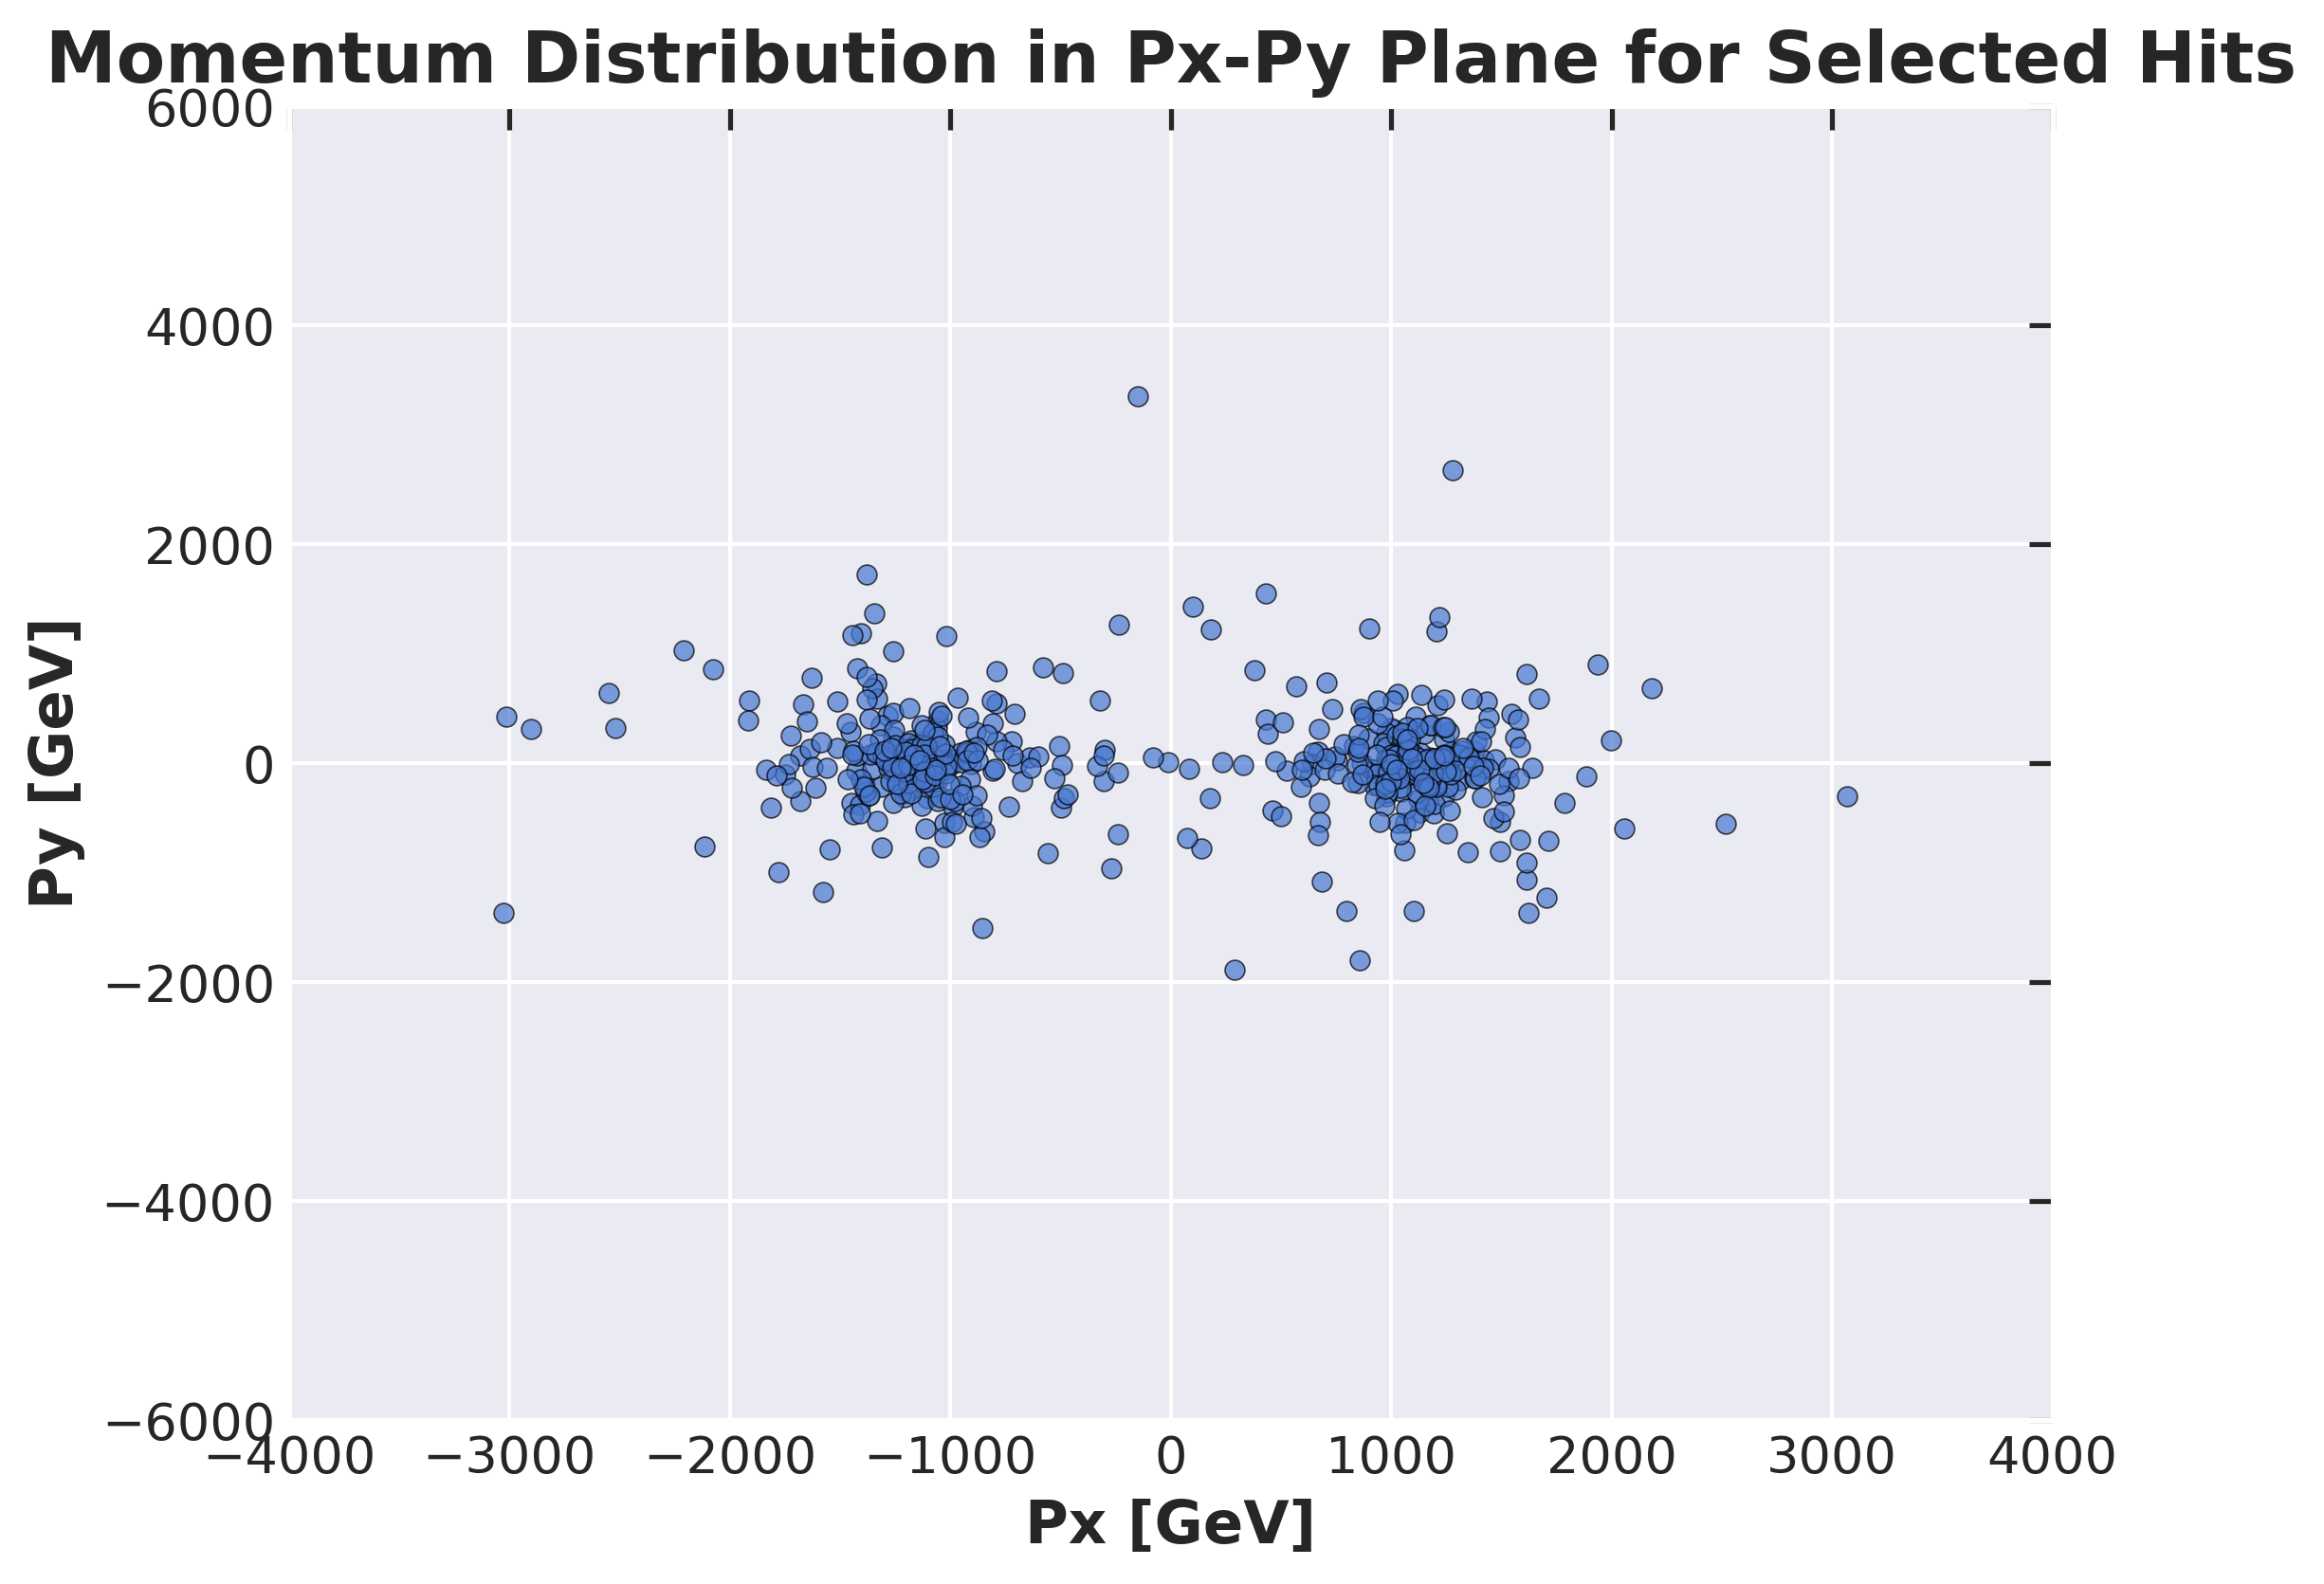

In [3]:
random_indices = np.random.choice(seed_data.shape[0], 500, replace=False)

# Scatter plot for the selected random hits
sns.scatterplot(x=seed_data['px'].iloc[random_indices], y=seed_data['py'].iloc[random_indices], 
                s=25, edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel('Px [GeV]')
plt.ylabel('Py [GeV]')
plt.title("Momentum Distribution in Px-Py Plane for Selected Hits")

# Set limits and grid
plt.xlim(-4000, 4000)
plt.ylim(-6000, 6000)

plt.savefig("{}/SciFiPxPy.png".format(figure_directory))
plt.show()


In [4]:
model_data =  seed_data[['nFTHits','tx','ty','ovtx_x','ovtx_y','eta','phi','chi2perdof','isMatched']]

In [5]:
model_data.head()

,nFTHits,tx,ty,ovtx_x,ovtx_y,eta,phi,chi2perdof,isMatched
0,12,-0.268153,0.021381,-1055.345947,173.193176,2.023796,3.062026,0.294202,True
1,12,-0.253765,0.028007,-877.907959,228.124252,2.074350,3.031673,0.115257,True
2,11,-0.152263,0.003205,-683.974304,15.691412,2.580823,3.120548,0.193786,True
3,11,-0.226330,-0.001189,-605.358765,5.201992,2.191462,-3.136340,0.199351,True
4,11,-0.119891,0.032337,-537.943909,257.031342,2.783041,2.878142,0.197270,True


In [6]:
model_data.to_parquet('SciFiTrackTrainingData.parquet')